# Домашняя работа №5

## Загрузка данных и первичный анализ

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("data/S05-hw-dataset.csv")
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [6]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [7]:
data['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

### Наблюдения:
В датасете 3000 объектов и 17 . Явных аномалий нет. Баланс классов практически одинаковый, но преобладает класс 0.

## Подготовка признаков и таргета

In [9]:
X = data.drop(columns=['default', 'client_id'])
y = data['default'].values

In [10]:
X

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2
2996,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12
2997,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10
2998,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8


In [11]:
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [12]:
 X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3000 non-null   int64  
 1   income                          3000 non-null   int64  
 2   years_employed                  3000 non-null   int64  
 3   credit_score                    3000 non-null   int64  
 4   debt_to_income                  3000 non-null   float64
 5   num_credit_cards                3000 non-null   int64  
 6   num_late_payments               3000 non-null   int64  
 7   has_mortgage                    3000 non-null   int64  
 8   has_car_loan                    3000 non-null   int64  
 9   savings_balance                 3000 non-null   int64  
 10  checking_balance                3000 non-null   int64  
 11  region_risk_score               3000 non-null   float64
 12  phone_calls_to_support_last_3m  30

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 15), (600, 15), (2400,), (600,))

In [51]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

y_pred = dummy_model.predict(X_test)

dummy_acc = accuracy_score(y_test, y_pred)
dummy_roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {dummy_acc}, ROC-AUC: {dummy_roc_auc}")

Accuracy: 0.59, ROC-AUC: 0.5


Бейзлайн - минимальный уровень производительности, который должна превышать любая более сложная модель

In [52]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=1000))])
param_grid = {
   'logreg__C': [0.01, 0.1, 1.0, 10.0]}
search = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)
search.best_score_

0.7883333333333333

In [53]:
search.best_params_

{'logreg__C': 0.01}

In [54]:
model = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(max_iter=1000, C = 0.01))])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=0.01, max_iter=1000))])

In [55]:
y_pred = model.predict(X_test)
y_pred_probas = model.predict_proba(X_test)[::,1]

log_acc = accuracy_score(y_pred, y_test)
log_roc_auc = roc_auc_score(y_pred, y_test)

print(f"Accuracy: {log_acc}, ROC_AUC: {log_roc_auc}")

Accuracy: 0.8066666666666666, ROC_AUC: 0.8095662507427213


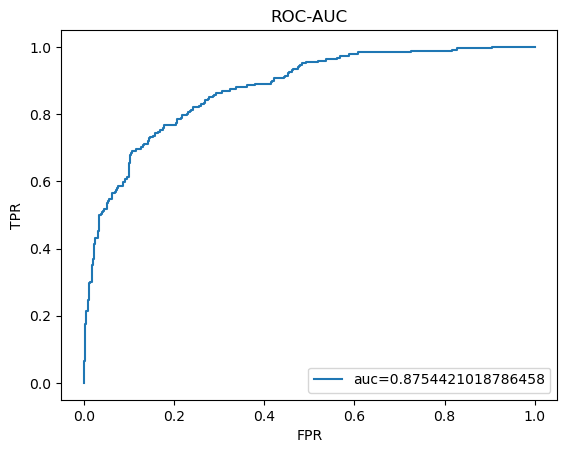

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-AUC')
plt.savefig("figures/ROC-AUC.png")
plt.show()

In [59]:
models_data = [
    {'Model': 'Dummy', 'Accuracy': dummy_acc, 'ROC-AUC': dummy_roc_auc},
    {'Model': 'LogisticRegression', 'Accuracy': log_acc, 'ROC-AUC': log_roc_auc},
    # можно добавить другие модели
]

df = pd.DataFrame(models_data).set_index('Model')
df

,Accuracy,ROC-AUC
Model,,
Dummy,0.590000,0.500000
LogisticRegression,0.806667,0.809566


Бейзлайн дает 59% accuracy и 50% roc_auc, Логистическая регрессия дает результат в 80% и там, и там.
Это обусловлено тем, что бейзлайн выдает самый частый класс, как ответ.

Accuracy и Roc_auc выросли на 30%, что хорошо.
Следовательно для этой задачи лучше использовать логистическую регрессию. Потому что она не просто выдает самый часто встречаемый класс.